In [2]:
import numpy as np # linear algebra - is for nerds.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [3]:
#read in dataset
df = pd.read_csv('C:/Users/jgles/dawg/Analysis/2013-2018NCAATeamStats_2.csv')
df

,Team,TS_ID,Conference,Season,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,...,Average.T.O.P,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,Akron,1,MAC,2013,12,5,7,106,837,4104,...,29:20:00,74,6,13,19,11,10,21,-2,-0.17
1,Alabama,2,SEC,2013,13,11,2,33,826,5903,...,32:00:00,48,8,11,19,10,7,17,2,0.15
2,Arizona,3,Pac-12,2013,13,8,5,31,1030,5960,...,28:30:00,39,4,18,22,11,7,18,4,0.31
3,Arizona St.,4,Pac-12,2013,14,10,4,32,1102,6402,...,30:21:00,7,12,21,33,6,12,18,15,1.07
4,Arkansas,5,SEC,2013,12,3,9,99,775,4286,...,30:26:00,111,6,8,14,12,11,23,-9,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,West Virginia,966,Big 12,2020,9,5,4,42,690,3804,...,32:38:00,42,2,10,12,6,3,9,3,0.33
966,Western Ky.,967,C-USA,2020,11,5,6,120,699,3200,...,29:23:00,83,4,5,9,10,2,12,-3,-0.27
967,Western Mich.,968,MAC,2020,6,4,2,15,392,2878,...,28:15:00,98,1,2,3,4,2,6,-3,-0.50
968,Wisconsin,969,Big Ten,2020,6,3,3,93,431,2153,...,36:45:00,98,4,4,8,5,6,11,-3,-0.50


In [4]:
# There are some extra columns that we drop here.

df = df.drop(['Unnamed: 146',
 'Unnamed: 147',
 'Unnamed: 148',
 'Unnamed: 149',
 'Unnamed: 150',
 'Unnamed: 151',
 'Unnamed: 152'],
       axis = 1)

df.head()

KeyError: "['Unnamed: 146' 'Unnamed: 147' 'Unnamed: 148' 'Unnamed: 149'\n 'Unnamed: 150' 'Unnamed: 151' 'Unnamed: 152'] not found in axis"

## Avg Rank and Yard Diff Per Play

There are two statistics that we want to derive and track throughout time.

Through the original analysis, the <Average Rank> and **Yard Differential Per Play** appeared to be powerful predictive metrics.  We will investigate here whether or not they hold predictive power throughout time.
    
We calculate those stats here.

In [8]:
df['Avg Rank']=(df['Off.Rank']+df['Def.Rank'])/2
df['Net Yards Per Play']=df['Off.Yards.Play'] - df['Yards.Play.Allowed']
df['winpct']=df['Win'] / df['Games']
df.head()

,Team,TS_ID,Conference,Season,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,...,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Avg Rank,Net Yards Per Play,winpct
0,Akron,1,MAC,2013,12,5,7,106,837,4104,...,13,19,11,10,21,-2,-0.17,82.5,-0.61,0.416667
1,Alabama,2,SEC,2013,13,11,2,33,826,5903,...,11,19,10,7,17,2,0.15,19.0,2.32,0.846154
2,Arizona,3,Pac-12,2013,13,8,5,31,1030,5960,...,18,22,11,7,18,4,0.31,46.5,0.53,0.615385
3,Arizona St.,4,Pac-12,2013,14,10,4,32,1102,6402,...,21,33,6,12,18,15,1.07,37.0,0.28,0.714286
4,Arkansas,5,SEC,2013,12,3,9,99,775,4286,...,8,14,12,11,23,-9,-0.75,87.5,-0.56,0.250000


## Net Yards Per Play

How predictive a metric is it?

### Dataset Imported.  Now lets take a look at all the different data points we have on this table.

After 2 hours of wrangling with getting the python script to work, Im ready to take a look at all these data points.  All these for 8 seasons of data...can we find the predictive trend?



In [9]:
list(df)

['Team',
 'TS_ID',
 'Conference',
 'Season',
 'Games',
 'Win',
 'Loss',
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attempt',
 'Yards.Completion',
 'Pass.Touchdowns',
 'Pas

In [10]:
data = df[['Team',
 'Conference',
 'Season',
 'Games',
 'Win',
 'Loss',
 'winpct',          
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attempt',
 'Yards.Completion',
 'Pass.Touchdowns',
 'Pass.Yards.Per.Game',
 'Pass.Def.Rank',
 'Opp.Completions.Allowed',
 'Opp.Pass.Attempts',
 'Opp.Pass.Yds.Allowed',
 'Opp.Pass.TDs.Allowed',
 'Yards.Attempt.Allowed',
 'Yards.Completion.Allowed',
 'Pass.Yards.Per.Game.Allowed',
 'Penalty.Rank',
 'Penalties',
 'Penalty.Yards',
 'Penalty.Yards.Per.Game',
 'Punt.Return.Rank',
 'Punt.Returns',
 'Net.Punt.Return.Yards',
 'Punt.Return.Touchdowns',
 'Avg.Yards.Per.Punt.Return',
 'Punt.Return.Def.Rank',
 'Opp.Punt.Returns',
 'Opp.Net.Punt.Return.Yards',
 'Opp.Punt.Return.Touchdowns.Allowed',
 'Avg.Yards.Allowed.per.Punt.Return',
 'Redzone.Off.Rank',
 'Redzone.Attempts',
 'Redzone.Rush.TD',
 'Redzone.Pass.TD',
 'Redzone.Field.Goals.Made',
 'Redzone.Scores',
 'Redzone.Points',
 'Redzone.Def.Rank',
 'Opp.Redzone.Attempts',
 'Opp.Redzone.Rush.TD.Allowed',
 'Opp.Redzone.Pass.Touchdowns.Allowed',
 'Opp.Redzone.Field.Goals.Made',
 'Opp.Redzone.Scores',
 'Redzone.Points.Allowed',
 'Rushing.Off.Rank',
 'Rush.Attempts',
 'Rush.Yds',
 'Yards.Rush',
 'Rushing.TD',
 'Rushing.Yards.per.Game',
 'Rushing.Def.Rank',
 'Opp.Rush.Attempts',
 'Opp.Rush.Yards.Alloweed',
 'Yds.Rush.Allowed',
 'Opp.Rush.Touchdowns.Allowed',
 'Rush.Yards.Per.Game.Allowed',
 'Sack.Rank',
 'Sacks',
 'Sack.Yards',
 'Average.Sacks.per.Game',
 'Scoring.Def.Rank',
 'Touchdowns.Allowed',
 'Opponent.Extra.Points',
 'X2.Point.Conversions.Allowed',
 'Opp.Deflected.Extra.Points',
 'Opp.Feild.Goals.Made',
 'Opp.Safety',
 'Points.Allowed',
 'Avg.Points.per.Game.Allowed',
 'Scoring.Off.Rank',
 'Touchdowns',
 'PAT',
 'X2.Point.Conversions',
 'Defensive.Points',
 'Feild.Goals',
 'Safety',
 'Total.Points',
 'Points.Per.Game',
 'Tackle.for.Loss.Rank',
 'Solo.Tackle.For.Loss',
 'Assist.Tackle.For.Loss',
 'Tackle.for.Loss.Yards',
 'Total.Tackle.For.Loss',
 'Tackle.For.Loss.Per.Game',
 'X3rd.Down.Rank',
 'X3rd.Attempts',
 'X3rd.Conversions',
 'X3rd.Percent',
 'X3rd.Down.Def.Rank',
 'Opp.3rd.Conversion',
 'Opp.3rd.Attempt',
 'Opponent.3rd.Percent',
 'Time.of.Possession.Rank',
 'Average.T.O.P',
 'Turnover.Rank',
 'Fumbles.Recovered',
 'Opponents.Intercepted',
 'Turnovers.Gain',
 'Fumbles.Lost',
 'Interceptions.Thrown.y',
 'Turnovers.Lost',
 'Turnover.Margin',
 'Avg.Turnover.Margin.per.Game',
 'Avg Rank',
 'Net Yards Per Play']
]
correlation=data.corr(method='pearson')
correlation

,Season,Games,Win,Loss,winpct,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Avg Rank,Net Yards Per Play
Season,1.000000,-0.454284,-0.150414,-0.136881,-0.019901,0.012947,-0.466405,-0.313571,0.042062,-0.191957,...,-0.297254,-0.310156,-0.388467,-0.288115,-0.314774,-0.398119,-0.017482,-0.009825,0.038239,-0.018545
Games,-0.454284,1.000000,0.572981,0.006188,0.317788,-0.172457,0.903381,0.757213,0.194910,0.598112,...,0.403781,0.495695,0.583035,0.340910,0.271553,0.396909,0.177655,0.159837,-0.241881,0.278957
Win,-0.150414,0.572981,1.000000,-0.816007,0.945728,-0.551086,0.566026,0.740957,0.617060,0.787186,...,0.271989,0.582645,0.577831,0.016267,-0.203538,-0.140187,0.578778,0.562373,-0.785139,0.799135
Loss,-0.136881,0.006188,-0.816007,1.000000,-0.929776,0.550762,-0.053471,-0.370003,-0.615424,-0.538621,...,-0.047075,-0.361290,-0.293815,0.220596,0.439869,0.450986,-0.580885,-0.573436,0.787373,-0.778300
winpct,-0.019901,0.317788,0.945728,-0.929776,1.000000,-0.582792,0.343304,0.587708,0.652899,0.690997,...,0.179243,0.500378,0.467419,-0.094616,-0.317267,-0.287956,0.599935,0.606174,-0.829892,0.835205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turnovers.Lost,-0.398119,0.396909,-0.140187,0.450986,-0.287956,0.118651,0.410933,0.174105,-0.225667,-0.019726,...,0.201259,0.117199,0.193964,0.686574,0.819880,1.000000,-0.596004,-0.589269,0.181064,-0.196734
Turnover.Margin,-0.017482,0.177655,0.578778,-0.580885,0.599935,-0.246905,0.164905,0.283030,0.305658,0.408653,...,0.409517,0.611334,0.672128,-0.352611,-0.533215,-0.596004,1.000000,0.981580,-0.418238,0.457194
Avg.Turnover.Margin.per.Game,-0.009825,0.159837,0.562373,-0.573436,0.606174,-0.250965,0.150296,0.268445,0.310874,0.393397,...,0.399623,0.596490,0.655834,-0.346890,-0.528556,-0.589269,0.981580,1.000000,-0.420972,0.461004
Avg Rank,0.038239,-0.241881,-0.785139,0.787373,-0.829892,0.709498,-0.337771,-0.602604,-0.681587,-0.665586,...,-0.071593,-0.411262,-0.344005,-0.001418,0.247460,0.181064,-0.418238,-0.420972,1.000000,-0.886595


In [13]:
correlation.drop(correlation.columns.difference(['winpct']),1, inplace=True)
correlation.sort_values(by=['winpct'], ascending=False)

,winpct
winpct,1.000000
Win,0.945728
Net Yards Per Play,0.835205
Points.Per.Game,0.750031
Total.Points,0.722688
...,...
Scoring.Def.Rank,-0.722897
Avg.Points.per.Game.Allowed,-0.729185
Scoring.Off.Rank,-0.743946
Avg Rank,-0.829892


C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


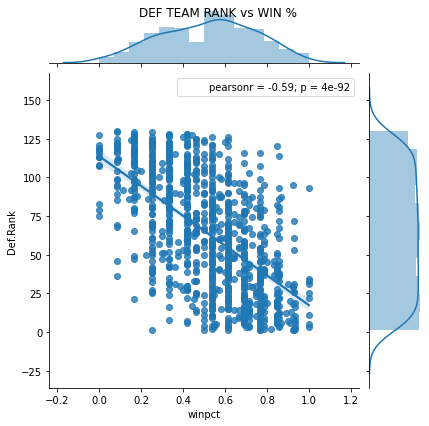

In [14]:
g=sns.jointplot('winpct','Def.Rank',df,kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('DEF TEAM RANK vs WIN %')
plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


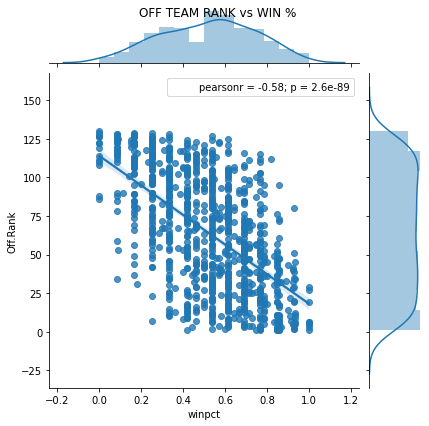

In [15]:
#Regression graph for Offensive Rank and Defensive Rank Vs Win Pct with correlation

#Results show a stronger correlation between Defensive Rank and Win Pct

g=sns.jointplot('winpct','Off.Rank',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('OFF TEAM RANK vs WIN %')
plt.show()

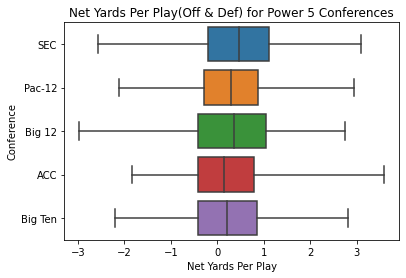

,Team,Season,Net Yards Per Play
25,Florida St.,2013,3.58
605,Clemson,2018,3.16
715,Alabama,2019,3.08
859,BYU,2020,3.04
69,Oregon,2013,2.93
734,Clemson,2019,2.92
586,Alabama,2018,2.87
155,Marshall,2014,2.86
790,Ohio St.,2019,2.81
845,Alabama,2020,2.79


In [20]:
filter=df['Conference']== 'ACC'
filter2=df['Conference']== 'SEC'
filter3=df['Conference']== 'Big 12'
filter4=df['Conference']== 'Big Ten' 
filter5=df['Conference']== 'Pac-12'
dfn=df.where(filter | filter2 | filter3 | filter4 | filter5)
sns.boxplot(dfn['Net Yards Per Play'], dfn['Conference'], whis=np.inf)
plt.title('Net Yards Per Play(Off & Def) for Power 5 Conferences')
plt.show()
df[['Team', 'Season','Net Yards Per Play']].sort_values('Net Yards Per Play', ascending = False)[0:25]

In [29]:
#Used to look 
print(df.pivot_table(index=['Team'], aggfunc='size'))

Team
Air Force          4
Akron              8
Alabama            8
App State          1
Appalachian St.    5
                  ..
West Virginia      8
Western Ky.        8
Western Mich.      8
Wisconsin          8
Wyoming            4
Length: 134, dtype: int64


## Interesting...This is a year over year comparison...who was the greatest team ever...statistically?

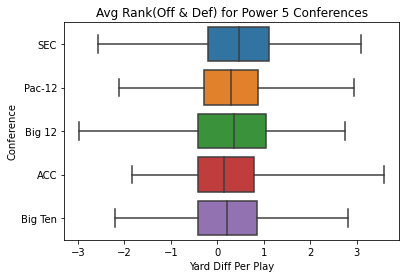

,Team,Season,Off.Rank,Def.Rank,Yard Diff Per Play
25,Florida St.,2013,6,3,3.58
605,Clemson,2018,3,5,3.16
715,Alabama,2019,6,20,3.08
859,BYU,2020,7,13,3.04
69,Oregon,2013,2,37,2.93
734,Clemson,2019,5,6,2.92
586,Alabama,2018,6,16,2.87
155,Marshall,2014,2,31,2.86
790,Ohio St.,2019,4,1,2.81
845,Alabama,2020,5,33,2.79


In [28]:
filter=df['Conference']== 'ACC'
filter2=df['Conference']== 'SEC'
filter3=df['Conference']== 'Big 12'
filter4=df['Conference']== 'Big Ten' 
filter5=df['Conference']== 'Pac-12'
dfn=df.where(filter | filter2 | filter3 | filter4 | filter5)
sns.boxplot(dfn['Yard Diff Per Play'], dfn['Conference'], whis=np.inf)
plt.title('Avg Rank(Off & Def) for Power 5 Conferences')
plt.show()
df[['Team', 'Season','Off.Rank','Def.Rank','Yard Diff Per Play']].sort_values('Yard Diff Per Play', ascending=False)[0:10]